In [1]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import pandas as pd
import numpy as np

dfQ = pd.read_csv('q_df_1500.csv', index_col=0, parse_dates=True, na_values = ['nan'])
# dfQ_column_list = list(dfQ.columns)
# print(dfQ_column_list)
dfQ_column_list = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'Q']
dfQ = dfQ[dfQ_column_list]
display(dfQ[dfQ_column_list])


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1,Hold,5.399670e+03
1,5.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,Hold,3.713936e+03
2,3.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,Buy,1.013913e+08
3,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,Sell,1.776122e+01
4,5.0,5.0,3.0,3.0,5.0,5.0,4.0,3.0,2.0,3.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0,Hold,2.949653e+09
5,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1,Sell,-1.100064e+11
6,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,Sell,2.053426e+08
7,4.0,4.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,Buy,5.940338e+07
8,5.0,4.0,5.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Sell,-1.141694e+08
9,4.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1,Sell,1.330663e+11


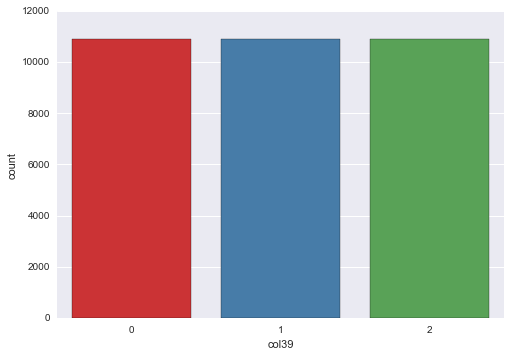

In [104]:
sns.countplot(dfQ['col39'], palette='Set1')

In [2]:
def transfer_action(x):
    if x == 'Buy':
        return 1
    elif x == 'Sell':
        return 2
    elif x == 'Hold':
        return 0
    else:
        raise ValueError("Wrong action!")

dfQ['col39'] = dfQ['col39'].apply(transfer_action)

display(dfQ)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1,0,5.399670e+03
1,5.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,3.713936e+03
2,3.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,1,1.013913e+08
3,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,2,1.776122e+01
4,5.0,5.0,3.0,3.0,5.0,5.0,4.0,3.0,2.0,3.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0,0,2.949653e+09
5,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1,2,-1.100064e+11
6,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,2,2.053426e+08
7,4.0,4.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,5.940338e+07
8,5.0,4.0,5.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,-1.141694e+08
9,4.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1,2,1.330663e+11


count    3.271200e+04
mean     2.448708e+10
std      3.601975e+11
min     -6.180664e+12
25%     -5.332813e+01
50%      1.648514e+03
75%      2.308621e+07
max      1.004833e+13
Name: Q, dtype: float64
                  0
count  2.166300e+04
mean   1.748242e+06
std    8.177168e+06
min   -3.448051e+07
25%   -6.662693e-01
50%    2.473923e+02
75%    1.534301e+05
max    5.757687e+07


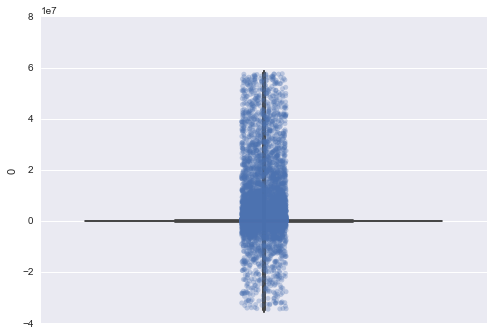

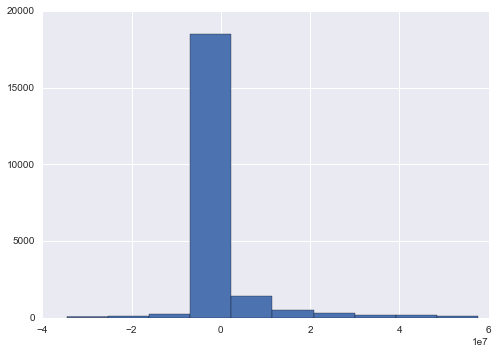

In [155]:
import seaborn as sns

def take_out_outliers(arr):
    q75, q25 = np.percentile(arr, [75 ,25])
    iqr = q75 - q25
    
    thres_bottom = q25 - 1.5 * iqr
    thres_top = q75 + 1.5 * iqr
    
#     print(thres)
    result = [u for u in arr if u > thres_bottom and u < thres_top]
    
    return result

print(dfQ['Q'].describe())
# print(dfQ['Q'])
dfQ_no_outliers = pd.DataFrame(take_out_outliers(dfQ['Q']))
print(dfQ_no_outliers.describe())

plt.figure()
ax_Q = sns.boxplot(y=0, data=dfQ_no_outliers, orient='v', color='.45')
ax_Q = sns.stripplot(y=0, data=dfQ_no_outliers, jitter=0.05, alpha=0.3)

plt.figure()
plt.hist(dfQ_no_outliers, bins=10)
plt.show()
# np.sign(dfQ) * np.log(np.abs(dfQ) + 1).boxplot(column='Q')

In [89]:
dfQ_X = dfQ.ix[:, :-1]
dfQ_y = dfQ.ix[:, -1]

dfQ_features = dfQ.ix[:, :-2]
dfQ_label = dfQ['col39']


In [90]:
import renders as rs
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca_X = PCA(n_components=15)
pca_features = PCA(n_components=15)

pca_X.fit(dfQ_X)
pca_features.fit(dfQ_features)

# TODO: Apply a PCA transformation to the sample log-data
# pca_samples = pca.transform(log_samples)

# Generate PCA results plot
# pca_results = rs.pca_results(dfQ_X, pca)
print(np.sum(pca_X.explained_variance_ratio_))
print(pca_X.explained_variance_ratio_)

print(np.sum(pca_features.explained_variance_ratio_))
print(pca_features.explained_variance_ratio_)

0.853866460269
[ 0.23393253  0.15540339  0.07479848  0.05125542  0.04040521  0.0374804
  0.03465612  0.03390669  0.03368601  0.0326508   0.03231753  0.02634899
  0.02290606  0.02229937  0.02181947]
0.865813816911
[ 0.23941662  0.15904652  0.07655198  0.052457    0.04135243  0.03835905
  0.03546857  0.03470157  0.03447571  0.03341624  0.03307515  0.02696669
  0.02282214  0.02233098  0.01537317]


,Dimension 1,Dimension 2
0,-1.608416,2.551724
1,2.563810,0.817736
2,2.417120,0.438946
3,0.160648,-4.319385
4,2.177738,-0.169088
5,2.481927,0.641077
6,-0.395033,1.790205
7,2.211215,0.038004
8,2.803074,0.299476
9,1.078463,-1.566141


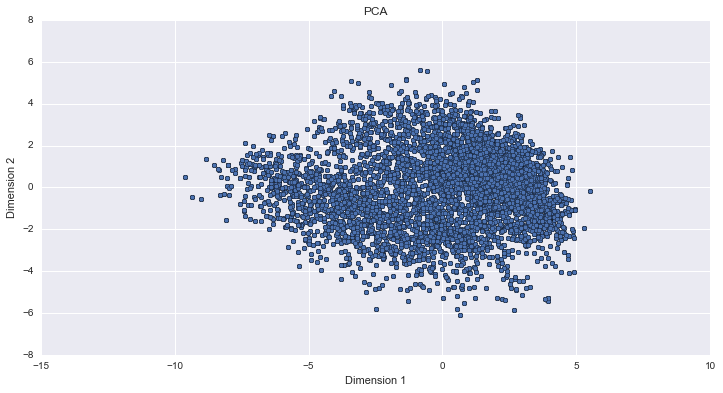

In [6]:
reduced_data = pca.transform(dfQ_X)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
display(reduced_data)

reduced_data.plot.scatter(x='Dimension 1', y='Dimension 2', title='PCA', figsize=(12, 6))
# plt.axhline(y=diff3['err percentage'].mean())
plt.show()

In [106]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = cross_validation.train_test_split(dfQ_X, dfQ_y, test_size=0.3, random_state=0)

# reduced_X = pca_X.transform(dfQ_X)
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(reduced_X, dfQ_y, test_size=0.3, random_state=0)


def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring = scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = plt.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
    
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


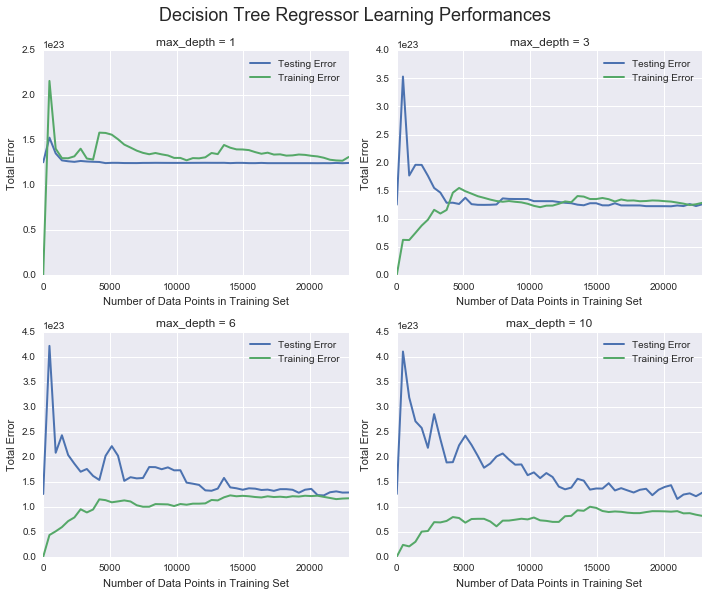

In [93]:
learning_curves(X_train, y_train, X_test, y_test)

Creating a model complexity graph. . . 


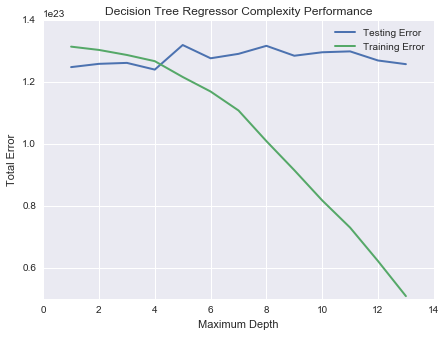

In [94]:
model_complexity(X_train, y_train, X_test, y_test)

In [114]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

# Before reduce:
# KNN 5: 0.03
# RF 128, 256: 0.45, 0.4718
# DTRegressor: 0.0075
# LR: useless

# After reduce:
# KNN 5: 0.0249
# RF 128: useless
# DTRegressor: 0.0075
# LR: useless

reg = RandomForestRegressor(n_estimators=256, criterion='mse', bootstrap=True)
# reg = KNeighborsRegressor(n_neighbors=5)
# reg = DecisionTreeRegressor(max_depth=4) 
# reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), random_state=0)
# reg = LinearRegression()
# reg = SVR()

reg.fit(X_train, y_train)

# single_X = np.array(X_test.ix[0])
# single_X = single_X.reshape(1, -1)
# print(single_X)
# y_pred = reg.predict(single_X)
# print(y_pred[0])

y_pred = reg.predict(X_test)

r2 = r2_score(list(y_test), y_pred)
print(r2)
print(reg.feature_importances_)

# df = y_test.to_frame()
# df.reset_index(inplace=True)
# df['Index'] = df.index
# df.plot(kind='scatter', x='Index', y='Q')

# df2 = pd.DataFrame(y_pred)
# df2.columns = ['Q']
# # print(df2)
# df2['Index'] = df2.index
# df2.plot(kind='scatter', x='Index', y='Q')

# df_log = df
# df_log['logQ'] = np.sign(df['Q']) * np.log(np.abs(df['Q']) + 1)
# print(df_log)
# df_log.plot(kind='scatter', x='Index', y='logQ')
# print(df_log['logQ'].describe())

0.459173569086
[ 0.0306445   0.03300027  0.03567012  0.03659401  0.03386402  0.02395117
  0.02025852  0.00372835  0.02876378  0.02949743  0.03160196  0.0211191
  0.02511588  0.01480003  0.02138793  0.01737799  0.02057883  0.02136726
  0.03818585  0.05230537  0.06490534  0.00722355  0.00834986  0.02056252
  0.00796095  0.00818666  0.00974428  0.01279483  0.02839053  0.00482032
  0.00767936  0.01258441  0.01062406  0.00686513  0.01409099  0.01531574
  0.0322996   0.09085858  0.09693092]


In [118]:
feature_importances = reg.feature_importances_
print(np.sum(feature_importances))

fi_tuple_list = []

for i, e in enumerate(feature_importances):
    fi_tuple_list.append((i, e))

sorted_by_second = sorted(fi_tuple_list, key=lambda tup: tup[1], reverse=True)
print(sorted_by_second)

1.0
[(38, 0.096930922048749285), (37, 0.090858582604411875), (20, 0.064905340155808761), (19, 0.052305365714205798), (18, 0.038185846916909544), (3, 0.036594012608871303), (2, 0.035670121487128899), (4, 0.033864017204440287), (1, 0.033000270402821316), (36, 0.032299604062892652), (10, 0.031601961803846758), (0, 0.030644496477757091), (9, 0.029497432569539312), (8, 0.028763775593730251), (28, 0.028390529731828127), (12, 0.02511588238893378), (5, 0.023951167283831135), (14, 0.021387925245419048), (17, 0.021367257084284125), (11, 0.021119103201281152), (16, 0.020578830973059632), (23, 0.020562520483600345), (6, 0.020258522336514855), (15, 0.017377989518104049), (35, 0.015315740618390274), (13, 0.014800026098059431), (34, 0.01409099023200816), (27, 0.012794832567105462), (31, 0.012584407241708112), (32, 0.010624058890223409), (26, 0.0097442826499048452), (22, 0.0083498640615102798), (25, 0.0081866552337672739), (24, 0.0079609521333525793), (30, 0.0076793629783562462), (21, 0.00722354894195

In [132]:
reducedF_X = dfQ_X.ix[:, [38, 37, 20, 19, 18, 3, 2, 4, 1, 36, 10, 9, 8, 28, 12, 5, 14, 17, 11, 16, 23, 6, 15, 35]]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(reducedF_X, dfQ_y, test_size=0.3, random_state=0)

# Tree 1000: 0.4158
reg = RandomForestRegressor(n_estimators=256, criterion='mse', bootstrap=True)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
r2 = r2_score(list(y_test), y_pred)
print(r2)
# print(reg.feature_importances_)


0.447460511667


(array([  2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   1.20000000e+01,   2.20000000e+01,
          4.10000000e+01,   7.60000000e+01,   5.45000000e+02,
          8.58400000e+03,   2.80000000e+02,   8.80000000e+01,
          4.20000000e+01,   3.30000000e+01,   2.70000000e+01,
          2.00000000e+01,   1.00000000e+01,   1.00000000e+01,
          6.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00]),
 array([ -3.08044492e+12,  -2.82677583e+12,  -2.57310674e+12,
         -2.31943765e+12,  -2.06576856e+12,  -1.81209947e+12,
         -1.55843038e+12,  -1.30476129e+12,  -1.05109220e+12,
         -7.97423109e+11,  -5.43754019e+11,  -2.90084929e+11,
         -3.64158386e+10,   2.17253251e+11,   4.70922342e+11,
          7.24591432e+11,   9.78260522e+11,   1.23192961e+12,
      

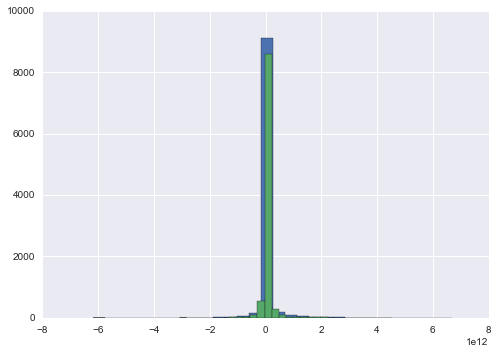

In [113]:
plt.hist(y_test, bins=30)
plt.hist(y_pred, bins=30)

In [56]:
# Action prediction datasets
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(dfQ_features, dfQ_label, test_size=0.3, random_state=0)

reduced_features = pca_features.transform(dfQ_features)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(reduced_features, dfQ_label, test_size=0.3, random_state=0)

In [63]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=10)
# y_pred = OneVsRestClassifier(SVC(random_state=0)).fit(X_train, y_train).predict(X_test)
clf = RandomForestClassifier(n_estimators=64)
# clf = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(y_pred)

[0 1 0 ..., 1 2 0]


In [64]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import random

def plus_one(x):
    return (x + 2) % 3

# score = f1_score(y_test, y_pred, pos_label='yes')
y_rand = [random.randint(0, 2) for r in xrange(len(y_test))]
y_0 = [0] * len(y_test)
y_1 = [1] * len(y_test)
y_2 = [2] * len(y_test)

y_pred_s = pd.Series(y_pred)
y_pred_h = y_pred_s.apply(plus_one)

score1 = accuracy_score(y_test, y_pred_s)
score2 = accuracy_score(y_test, y_rand)
score3 = accuracy_score(y_test, y_pred_h)
# score4 = accuracy_score(y_test, y_0)
# score5 = accuracy_score(y_test, y_1)
# score6 = accuracy_score(y_test, y_2)
print(score1)
print(score2)
print(score3)
# print(score4)
# print(score5)
# print(score6)

0.0748930099857
0.326472386387
0.461687385368


In [59]:
print(y_test.describe())
# y_pred_s = pd.Series(y_pred)
# print(y_pred_s.describe())
# print(y_pred_s.isnull().sum())
print(y_test)

count    9814.000000
mean        1.011514
std         0.812223
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: col39, dtype: float64
27890    1
828      2
8429     1
12637    1
16525    1
28843    1
2533     0
9473     1
6189     1
23461    0
7174     1
959      0
20531    2
22306    1
22199    0
22357    1
276      0
11274    2
23949    1
1963     2
19111    1
22871    0
5642     0
2639     1
9404     1
30254    0
11440    2
14852    2
20090    0
24715    0
        ..
14341    0
405      1
26051    2
12614    0
30578    1
31774    1
32470    2
32027    1
22242    1
20600    0
16344    1
31209    2
24718    2
29811    1
2904     0
23070    2
10045    1
29850    2
17643    0
24085    1
13845    0
32088    2
11745    1
11252    2
11229    0
12244    1
16716    0
9606     0
24502    1
29398    2
Name: col39, dtype: int64


In [60]:
df_compare = y_test.to_frame()
df_compare.reset_index(inplace=True)
df_compare['Pred'] =  y_pred_s
display(df_compare)

,index,col39,Pred
0,27890,1,0
1,828,2,0
2,8429,1,0
3,12637,1,0
4,16525,1,0
5,28843,1,0
6,2533,0,1
7,9473,1,0
8,6189,1,0
9,23461,0,1


In [5]:
import pandas as pd
df = pd.read_csv('fuck_q_df.csv', index_col=0, parse_dates=True, na_values = ['nan'])
df['col38']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
5        0.0
6        1.0
7        0.0
8        0.0
9        0.0
10       1.0
11       1.0
12       0.0
13       1.0
14       1.0
15       1.0
16       0.0
17       0.0
18       1.0
19       1.0
20       0.0
21       1.0
22       0.0
23       1.0
24       1.0
25       1.0
26       0.0
27       0.0
28       0.0
29       1.0
        ... 
22379    0.0
22380    0.0
22381    0.0
22382    1.0
22383    0.0
22384    1.0
22385    0.0
22386    0.0
22387    0.0
22388    0.0
22389    1.0
22390    0.0
22391    0.0
22392    1.0
22393    1.0
22394    0.0
22395    0.0
22396    1.0
22397    1.0
22398    1.0
22399    1.0
22400    0.0
22401    1.0
22402    1.0
22403    0.0
22404    0.0
22405    1.0
22406    1.0
22407    0.0
22408    1.0
Name: col38, dtype: float64